<a href="https://colab.research.google.com/github/plaban1981/HACKEREARTH/blob/master/Hackerearth_deep_learning_hack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Identify the dance form

# Problem statement
This International Dance Day, an event management company organized an evening of Indian classical dance performances to celebrate the rich, eloquent, and elegant art of dance. After the event, the company plans to create a microsite to promote and raise awareness among people about these dance forms. However, identifying them from images is a difficult task.

You are appointed as a Machine Learning Engineer for this project. Your task is to build a deep learning model that can help the company classify these images into eight categories of Indian classical dance.

Note

The eight categories of Indian classical dance are as follows:

- Manipuri
- Bharatanatyam
- Odissi
- Kathakali
- Kathak
- Sattriya
- Kuchipudi
- Mohiniyattam

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [74]:
import numpy as np
np.random.seed(1000)
import pandas as pd
import matplotlib.pyplot as plt

import os
import cv2
from PIL import Image

%matplotlib inline

In [21]:
!unzip /content/drive/'My Drive'/HackerEarth_deep_learning/0664343c9a8f11ea.zip

Archive:  /content/drive/My Drive/HackerEarth_deep_learning/0664343c9a8f11ea.zip
   creating: dataset/
   creating: dataset/test/
  inflating: dataset/test/508.jpg    
  inflating: dataset/test/246.jpg    
  inflating: dataset/test/473.jpg    
  inflating: dataset/test/485.jpg    
  inflating: dataset/test/128.jpg    
  inflating: dataset/test/410.jpg    
  inflating: dataset/test/465.jpg    
  inflating: dataset/test/196.jpg    
  inflating: dataset/test/340.jpg    
  inflating: dataset/test/467.jpg    
  inflating: dataset/test/306.jpg    
  inflating: dataset/test/171.jpg    
  inflating: dataset/test/323.jpg    
  inflating: dataset/test/332.jpg    
  inflating: dataset/test/330.jpg    
  inflating: dataset/test/170.jpg    
  inflating: dataset/test/479.jpg    
  inflating: dataset/test/9.jpg      
  inflating: dataset/test/283.jpg    
  inflating: dataset/test/114.jpg    
  inflating: dataset/test/507.jpg    
  inflating: dataset/test/183.jpg    
  inflating: dataset/test/200.jpg 

In [113]:
train = pd.read_csv('/content/dataset/train.csv')
test = pd.read_csv('/content/dataset/test.csv')

In [291]:
train.shape,test.shape

((364, 2), (156, 1))

In [295]:
train.head()

,Image,target
0,96.jpg,manipuri
1,163.jpg,bharatanatyam
2,450.jpg,odissi
3,219.jpg,kathakali
4,455.jpg,odissi


In [6]:
train.target.unique()

array(['manipuri', 'bharatanatyam', 'odissi', 'kathakali', 'kathak',
       'sattriya', 'kuchipudi', 'mohiniyattam'], dtype=object)

In [7]:
train.target.value_counts(normalize =True)

mohiniyattam     0.137363
odissi           0.134615
kathakali        0.129121
bharatanatyam    0.129121
kuchipudi        0.126374
sattriya         0.123626
kathak           0.120879
manipuri         0.098901
Name: target, dtype: float64

In [69]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [70]:
img_path = '/content/dataset/train/'

In [71]:
train_data = train.copy()

In [75]:
train_dataset= []
train_labels  = []
for img in train_data['Image'].values.tolist():
  image = cv2.imread(img_path+img)
  image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  image = Image.fromarray(image)
  image = image.resize((224,224))
  train_dataset.append(np.array(image))
  train_labels.append(train_data.loc[train_data['Image']== img,'target'].values[0])



In [76]:
img_path_test = '/content/dataset/test/'

In [77]:
test_dataset= []
for img in test['Image'].values.tolist():
  image = cv2.imread(img_path_test+img)
  image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  image = Image.fromarray(image)
  image = image.resize((224,224))
  test_dataset.append(np.array(image))

In [78]:
len(train_dataset),len(test_dataset)

(364, 156)

## Visualize Training images

In [79]:
def show_image(image_data,label_data):
  plt.figure(figsize = (12, 12))
  for i in range(25):
    ax = plt.subplot(5,5,i+1)
    plt.imshow(image_data[i])
    plt.title(label_data[i].title())
    plt.axis('off')


## Visualize Validation Images

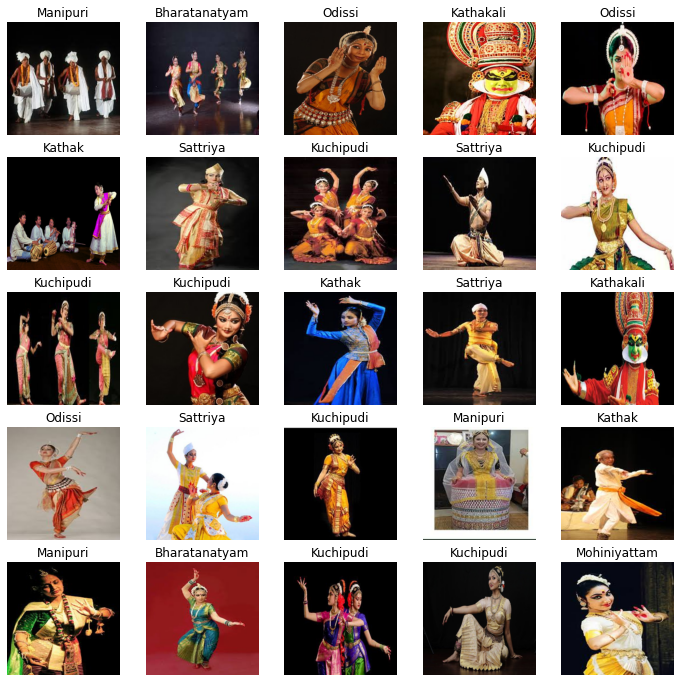

In [80]:
show_image(train_dataset,train_labels)

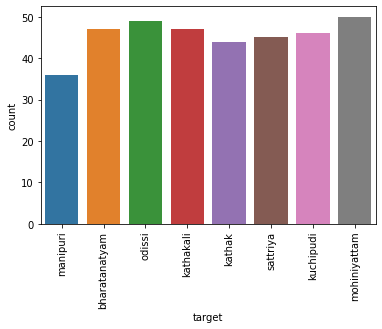

In [322]:
import seaborn as sns
sns.countplot(train_data['target'])
plt.xticks(rotation=90)
plt.show()

In [81]:
training_labels = lb.fit_transform(train_labels)

# Divide our data into training and validation set to validate our model performance

In [82]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train_dataset,training_labels,test_size=0.33,random_state=42)

Apply **“image augmentation”** to generate multiple feature and avoid over fitting of the model. We apply re-scaling of numeric data by dividing all values by 255 to make all values will be between 0 to 1. For validation and test data set we only use re-scaling to prevent over performance of our model on unseen data.

In [87]:
from keras.layers import Input,Dense,Flatten,Dropout,GlobalAveragePooling2D,MaxPooling2D,BatchNormalization,Conv2D
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model,Sequential
from keras.applications.vgg16 import VGG16
from keras.applications.nasnet import NASNetLarge
from keras.applications.resnet50 import ResNet50
from keras import optimizers
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from glob import glob

In [88]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   featurewise_center=False,
                                   samplewise_center = False,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
validation_datagen = ImageDataGenerator(rescale=1./255)

In [89]:
train_datagen.fit(X_train)
validation_datagen.fit(X_test)

In [90]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [91]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(243, 224, 224, 3)
(121, 224, 224, 3)
(243,)
(121,)


# VGG16

In [131]:
conv_base = VGG16(input_shape =  (224, 224, 3), include_top = False, weights = 'imagenet',pooling='max')
for layer in conv_base.layers:
    layer.trainable = True

In [132]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [133]:
#conv_base.trainable = False
model = Sequential([conv_base,
                    Dense(4096,activation='relu'),
                    Dropout(0.2),
                    Dense(4096,activation='relu'),
                    Dropout(0.2),
                    Dense(8,activation='softmax')
                    ])



In [136]:
model.compile(optimizer=optimizers.RMSprop(lr=0.00005),
              loss ='categorical_crossentropy',
              metrics=['accuracy'])

In [145]:
import keras
lr = keras.callbacks.ReduceLROnPlateau(monitor='loss',factor=0.1,patience=2,cooldown=2,min_lr=0.00005,verbose=1)

In [146]:
history = model.fit(train_datagen.flow(X_train,to_categorical(y_train,8),batch_size=32),
                    validation_data=validation_datagen.flow(X_test,to_categorical(y_test,8),batch_size=32),
                    verbose=2,
                    epochs=50,callbacks=[lr])

Epoch 1/50
 - 5s - loss: 0.5992 - accuracy: 0.8889 - val_loss: 1.2498 - val_accuracy: 0.7769
Epoch 2/50
 - 5s - loss: 0.0654 - accuracy: 0.9877 - val_loss: 1.1064 - val_accuracy: 0.8182
Epoch 3/50
 - 5s - loss: 0.0036 - accuracy: 1.0000 - val_loss: 1.0920 - val_accuracy: 0.8347
Epoch 4/50
 - 5s - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.3877 - val_accuracy: 0.8512
Epoch 5/50
 - 5s - loss: 0.0015 - accuracy: 1.0000 - val_loss: 1.6673 - val_accuracy: 0.8347
Epoch 6/50
 - 5s - loss: 0.5539 - accuracy: 0.9095 - val_loss: 1.1962 - val_accuracy: 0.7769
Epoch 7/50
 - 5s - loss: 0.0738 - accuracy: 0.9712 - val_loss: 0.9251 - val_accuracy: 0.8182
Epoch 8/50
 - 5s - loss: 0.0338 - accuracy: 0.9877 - val_loss: 0.6182 - val_accuracy: 0.8099
Epoch 9/50
 - 5s - loss: 0.0066 - accuracy: 1.0000 - val_loss: 2.1110 - val_accuracy: 0.8264
Epoch 10/50
 - 5s - loss: 1.1394 - accuracy: 0.8848 - val_loss: 0.9197 - val_accuracy: 0.7521
Epoch 11/50
 - 5s - loss: 0.0793 - accuracy: 0.9753 - val_loss: 0.980

In [160]:
history = model.fit(train_datagen.flow(np.array(train_dataset),to_categorical(training_labels,8),batch_size=32),
                    verbose=2,
                    epochs=50,callbacks=[lr])

Epoch 1/50
 - 7s - loss: 0.6184 - accuracy: 0.8819
Epoch 2/50
 - 6s - loss: 0.4714 - accuracy: 0.8736
Epoch 3/50
 - 6s - loss: 0.2003 - accuracy: 0.9341
Epoch 4/50
 - 6s - loss: 0.2778 - accuracy: 0.9286
Epoch 5/50
 - 6s - loss: 0.2244 - accuracy: 0.9286
Epoch 6/50
 - 6s - loss: 0.2565 - accuracy: 0.9231
Epoch 7/50
 - 7s - loss: 0.1365 - accuracy: 0.9560
Epoch 8/50
 - 6s - loss: 0.0990 - accuracy: 0.9698
Epoch 9/50
 - 6s - loss: 0.2152 - accuracy: 0.9286
Epoch 10/50
 - 7s - loss: 0.1136 - accuracy: 0.9643
Epoch 11/50
 - 7s - loss: 0.1925 - accuracy: 0.9478
Epoch 12/50
 - 7s - loss: 0.0813 - accuracy: 0.9780
Epoch 13/50
 - 7s - loss: 0.1792 - accuracy: 0.9505
Epoch 14/50
 - 7s - loss: 0.1741 - accuracy: 0.9560
Epoch 15/50
 - 7s - loss: 0.0447 - accuracy: 0.9918
Epoch 16/50
 - 7s - loss: 0.3654 - accuracy: 0.8956
Epoch 17/50
 - 7s - loss: 0.0863 - accuracy: 0.9780
Epoch 18/50
 - 7s - loss: 0.1176 - accuracy: 0.9588
Epoch 19/50
 - 7s - loss: 0.0967 - accuracy: 0.9725
Epoch 20/50
 - 7s - l

In [161]:
test_dataset = np.array(test_dataset)

In [164]:
predictions = model.predict(test_dataset)

In [165]:
preds = [np.argmax(x) for x in predictions]

In [166]:
preds_enc = lb.inverse_transform(preds)

In [151]:
len(preds_enc)

156

In [167]:
test.head()

,Image,target
0,508.jpg,kuchipudi
1,246.jpg,kuchipudi
2,473.jpg,odissi
3,485.jpg,odissi
4,128.jpg,bharatanatyam


In [168]:
test['target'] = preds_enc

In [169]:
test.head()

,Image,target
0,508.jpg,odissi
1,246.jpg,kuchipudi
2,473.jpg,odissi
3,485.jpg,odissi
4,128.jpg,bharatanatyam


Text(0.5, 1.0, 'mohiniyattam')

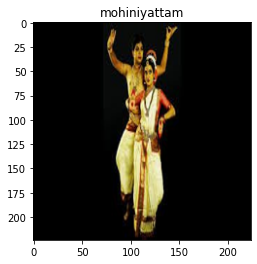

In [170]:
plt.imshow(test_dataset[-10])
plt.title(test['target'].iloc[-10])

## Visualize Predictions

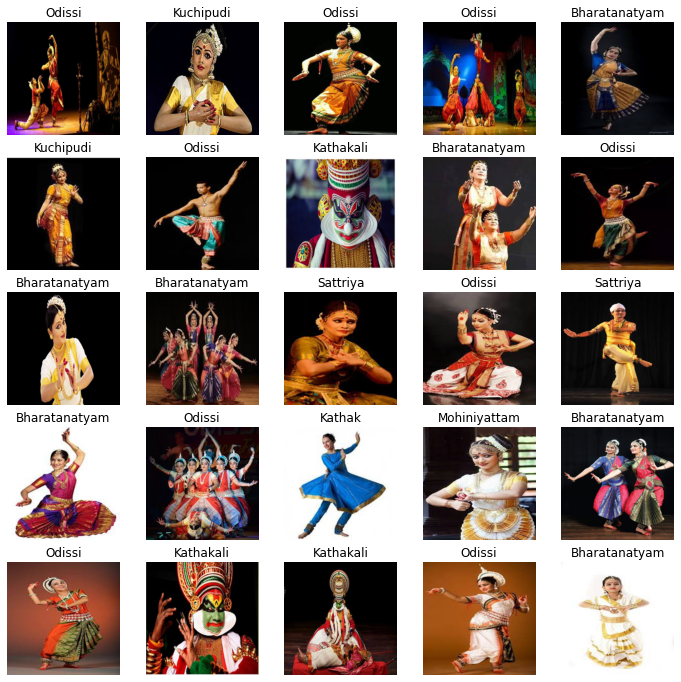

In [173]:
show_image(test_dataset,test['target'].values.tolist())

In [172]:
test.to_csv('VGG16_t3.csv',index=False)

# Visualize Performance of VGG16 Model 

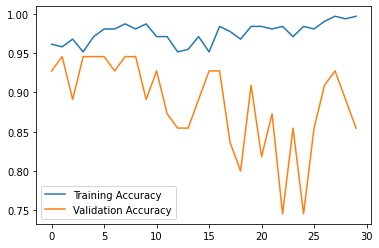

In [183]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.show()

# Vgg19

In [184]:
vgg19_model = keras.applications.VGG19(input_shape=(224,224,3),weights = 'imagenet',include_top=False)

80142336/80134624 [==============================] - 1s 0us/step


In [185]:
for layer in vgg19_model.layers:
    layer.trainable = False


In [191]:
last_layer = vgg19_model.output
x = GlobalAveragePooling2D()(last_layer)
# add fully-connected & dropout layers
x = Dense(4096, activation='relu',name='fc-1')(x)
x = Dropout(0.2)(x)
x = Dense(4096, activation='relu',name='fc-2')(x)
x = Dropout(0.2)(x)


# a softmax layer for 8 classes
num_classes = 8
out = Dense(num_classes, activation='softmax',name='output_layer')(x)

# this is the model we will train
model2 = Model(inputs=vgg19_model.input, outputs=out)

model2.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [192]:
model2.compile(optimizer='adam',
              loss ='categorical_crossentropy',
              metrics=['accuracy'])

In [193]:
history = model2.fit(X_train,y_train, batch_size=30, epochs = 30, validation_data = (X_test,y_test))

Train on 309 samples, validate on 55 samples
Epoch 1/30
309/309 [==============================] - 5s 15ms/step - loss: 17.2026 - accuracy: 0.1812 - val_loss: 2.4453 - val_accuracy: 0.2727
Epoch 2/30
309/309 [==============================] - 4s 14ms/step - loss: 1.3093 - accuracy: 0.5502 - val_loss: 1.2940 - val_accuracy: 0.5818
Epoch 3/30
309/309 [==============================] - 4s 14ms/step - loss: 0.6206 - accuracy: 0.8155 - val_loss: 1.3751 - val_accuracy: 0.5455
Epoch 4/30
309/309 [==============================] - 4s 14ms/step - loss: 0.3094 - accuracy: 0.8932 - val_loss: 1.2283 - val_accuracy: 0.7091
Epoch 5/30
309/309 [==============================] - 4s 14ms/step - loss: 0.1435 - accuracy: 0.9644 - val_loss: 1.4497 - val_accuracy: 0.6364
Epoch 6/30
309/309 [==============================] - 4s 14ms/step - loss: 0.1370 - accuracy: 0.9547 - val_loss: 1.7412 - val_accuracy: 0.5636
Epoch 7/30
309/309 [==============================] - 4s 14ms/step - loss: 0.1170 - accuracy: 0.

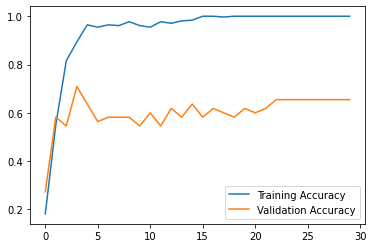

In [194]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.show()

## Using NASNETLARGE

In [195]:
train_dataset_nas= []
for img in train_data['Image'].values.tolist():
  image = cv2.imread(img_path+img)
  image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  image = Image.fromarray(image)
  image = image.resize((331,331))
  train_dataset_nas.append(np.array(image))


In [196]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train_dataset_nas ,train_data['target'],test_size=0.15,random_state=42,stratify=train_data['target'])

In [197]:
y_train = to_categorical(y_train, num_classes = 8)
y_test = to_categorical(y_test, num_classes = 8)

In [198]:
conv_base = keras.applications.NASNetLarge(input_shape =  (331,331, 3), include_top = False, weights = 'imagenet')
for layer in conv_base.layers:
    layer.trainable = False

343613440/343610240 [==============================] - 5s 0us/step


In [199]:
last_layer = conv_base.output
x = GlobalAveragePooling2D()(last_layer)
# add fully-connected & dropout layers
x = Dense(4096, activation='relu',name='fc-1')(x)
x = Dropout(0.2)(x)
x = Dense(4096, activation='relu',name='fc-2')(x)
x = Dropout(0.2)(x)


# a softmax layer for 8 classes
num_classes = 8
out = Dense(num_classes, activation='softmax',name='output_layer')(x)

# this is the model we will train
model2 = Model(inputs=conv_base.input, outputs=out)

model2.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 331, 331, 3)  0                                            
__________________________________________________________________________________________________
stem_conv1 (Conv2D)             (None, 165, 165, 96) 2592        input_5[0][0]                    
__________________________________________________________________________________________________
stem_bn1 (BatchNormalization)   (None, 165, 165, 96) 384         stem_conv1[0][0]                 
__________________________________________________________________________________________________
activation_50 (Activation)      (None, 165, 165, 96) 0           stem_bn1[0][0]                   
____________________________________________________________________________________________

In [202]:
X_train = np.array(X_train)
X_test = np.array(X_test)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(309, 331, 331, 3)
(55, 331, 331, 3)
(309, 8)
(55, 8)


In [200]:
model2.compile(optimizer='adam',
              loss ='categorical_crossentropy',
              metrics=['accuracy'])

In [203]:
history = model2.fit(X_train,y_train, batch_size=30, epochs = 30, validation_data = (X_test,y_test))

Train on 309 samples, validate on 55 samples
Epoch 1/30
309/309 [==============================] - 51s 165ms/step - loss: 4.6399 - accuracy: 0.2330 - val_loss: 2.2336 - val_accuracy: 0.0909
Epoch 2/30
309/309 [==============================] - 30s 96ms/step - loss: 1.4386 - accuracy: 0.4790 - val_loss: 2.8541 - val_accuracy: 0.0909
Epoch 3/30
309/309 [==============================] - 30s 96ms/step - loss: 0.9423 - accuracy: 0.6828 - val_loss: 3.2173 - val_accuracy: 0.1455
Epoch 4/30
309/309 [==============================] - 30s 96ms/step - loss: 0.5131 - accuracy: 0.8350 - val_loss: 3.8368 - val_accuracy: 0.1091
Epoch 5/30
309/309 [==============================] - 30s 96ms/step - loss: 0.5227 - accuracy: 0.8317 - val_loss: 4.3607 - val_accuracy: 0.0909
Epoch 6/30
309/309 [==============================] - 30s 95ms/step - loss: 0.2735 - accuracy: 0.9256 - val_loss: 4.9090 - val_accuracy: 0.1273
Epoch 7/30
309/309 [==============================] - 30s 95ms/step - loss: 0.1550 - accur

In [265]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [266]:
from fastai.vision import *
from fastai.metrics import error_rate

In [267]:
bs = 64
# bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

In [8]:
!git clone https://github.com/Tessellate-Imaging/monk_v1.git


Cloning into 'monk_v1'...
remote: Enumerating objects: 140, done.
remote: Counting objects: 100% (140/140), done.
remote: Compressing objects: 100% (99/99), done.
remote: Total 4680 (delta 91), reused 74 (delta 41), pack-reused 4540
Receiving objects: 100% (4680/4680), 114.51 MiB | 13.75 MiB/s, done.
Resolving deltas: 100% (2987/2987), done.


In [442]:
!mkdir /content/drive/'My Drive'/HackerEarth_deep_learning/data/

mkdir: cannot create directory ‘/content/drive/My Drive/HackerEarth_deep_learning/data/’: File exists


In [282]:
%cp -av /content/dataset/validation/  /content/drive/'My Drive'/HackerEarth_deep_learning/data

'/content/dataset/validation/' -> '/content/drive/My Drive/HackerEarth_deep_learning/data/validation'
'/content/dataset/validation/mohiniyattam' -> '/content/drive/My Drive/HackerEarth_deep_learning/data/validation/mohiniyattam'
'/content/dataset/validation/mohiniyattam/274.jpg' -> '/content/drive/My Drive/HackerEarth_deep_learning/data/validation/mohiniyattam/274.jpg'
'/content/dataset/validation/mohiniyattam/277.jpg' -> '/content/drive/My Drive/HackerEarth_deep_learning/data/validation/mohiniyattam/277.jpg'
'/content/dataset/validation/mohiniyattam/245.jpg' -> '/content/drive/My Drive/HackerEarth_deep_learning/data/validation/mohiniyattam/245.jpg'
'/content/dataset/validation/mohiniyattam/289.jpg' -> '/content/drive/My Drive/HackerEarth_deep_learning/data/validation/mohiniyattam/289.jpg'
'/content/dataset/validation/mohiniyattam/251.jpg' -> '/content/drive/My Drive/HackerEarth_deep_learning/data/validation/mohiniyattam/251.jpg'
'/content/dataset/validation/mohiniyattam/298.jpg' -> '/

# AI MOnk

In [9]:
!cd monk_v1/installation/Misc && pip install -r requirements_colab.txt

     |████████████████████████████████| 710.5MB 25kB/s 
     |████████████████████████████████| 757kB 48.8MB/s 
  Created wheel for GPUtil: filename=GPUtil-1.4.0-cp36-none-any.whl size=7413 sha256=a22c04155f9e7c46a9fd6a4afebd5db1d7e8590f66820b3ff69f5d546a4a6c69
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built GPUtil
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [10]:
import os
import sys
sys.path.append("monk_v1/monk/");

In [11]:
#Using keras backend 
from keras_prototype import prototype

In [12]:
gtf = prototype(verbose=1);
gtf.Prototype("dance-form", "classification");

Keras Version: 2.3.1
Tensorflow Version: 2.2.0

Experiment Details
    Project: dance-form
    Experiment: classification
    Dir: /content/workspace/dance-form/classification/



In [13]:
gtf.List_Models();

Models List: 
    1. mobilenet
    2. densenet121
    3. densenet169
    4. densenet201
    5. inception_v3
    6. inception_resnet_v3
    7. mobilenet_v2
    8. nasnet_mobile
    9. nasnet_large
    10. resnet50
    11. resnet101
    12. resnet152
    13. resnet50_v2
    14. resnet101_v2
    15. resnet152_v2
    16. vgg16
    17. vgg19
    18. xception



In [14]:
gtf.Default(dataset_path="/content/drive/My Drive/HackerEarth_deep_learning/data/trainining", 
            model_name="vgg19", 
            freeze_base_network=True,
            num_epochs=30);

Dataset Details
    Train path:     /content/drive/My Drive/HackerEarth_deep_learning/data/trainining
    Val path:       None
    CSV train path: None
    CSV val path:   None
    Label Type:     single

Dataset Params
    Input Size:   224
    Batch Size:   4
    Data Shuffle: True
    Processors:   2
    Train-val split:   0.7

Found 182 images belonging to 8 classes.
Found 72 images belonging to 8 classes.
Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'MeanSubtraction': {'mean': [0.485, 0.456, 0.406]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'MeanSubtraction': {'mean': [0.485, 0.456, 0.406]}}]

Dataset Numbers
    Num train images: 182
    Num val images:   72
    Num classes:      8

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Model Params
    Model name:           vgg19
    Use Gpu:              True
    Gpu Memory Fraction:  0.6
    Use pretrained:       True
    Freeze base network:  True

In [15]:
gtf.Train();

Training Start
Epoch 1/30
45/45 [==============================] - 129s 3s/step - loss: 8.8078 - accuracy: 0.1236 - val_loss: 5.5728 - val_accuracy: 0.2778

Epoch 00001: saving model to workspace/dance-form/classification/output/models/resume_state.h5

Epoch 00001: val_loss improved from inf to 5.57279, saving model to workspace/dance-form/classification/output/models/best_model.h5

Epoch 00001: saving model to workspace/dance-form/classification/output/models/intermediate_model_01.h5
Epoch 2/30
45/45 [==============================] - 3s 63ms/step - loss: 4.0910 - accuracy: 0.3652 - val_loss: 3.4942 - val_accuracy: 0.4444

Epoch 00002: saving model to workspace/dance-form/classification/output/models/resume_state.h5

Epoch 00002: val_loss improved from 5.57279 to 3.49425, saving model to workspace/dance-form/classification/output/models/best_model.h5

Epoch 00002: saving model to workspace/dance-form/classification/output/models/intermediate_model_02.h5
Epoch 3/30
45/45 [=============

<Figure size 432x288 with 0 Axes>

In [16]:
gtf = prototype(verbose=1);
gtf.Prototype("dance-form", "classification", eval_infer=True);

Keras Version: 2.3.1
Tensorflow Version: 2.2.0

Model Details
    Loading model - workspace/dance-form/classification/output/models/final.h5
    Model loaded!

Experiment Details
    Project: dance-form
    Experiment: classification
    Dir: /content/workspace/dance-form/classification/



In [17]:
gtf.Dataset_Params(dataset_path="/content/drive/My Drive/HackerEarth_deep_learning/data/validation");
gtf.Dataset();

Dataset Details
    Test path:     /content/drive/My Drive/HackerEarth_deep_learning/data/validation
    CSV test path:  None

Dataset Params
    Input Size:  224
    Processors:   2

Found 110 images belonging to 8 classes.
Pre-Composed Test Transforms
[{'MeanSubtraction': {'mean': [0.485, 0.456, 0.406]}}]

Dataset Numbers
    Num test images: 110
    Num classes:      8



In [18]:
accuracy, class_based_accuracy = gtf.Evaluate();

Testing
110/110 [==============================] - 35s 321ms/step

    Result
        class based accuracies
            0. bharatanatyam - 85.71428571428571 %
            1. kathak - 76.92307692307693 %
            2. kathakali - 100.0 %
            3. kuchipudi - 42.857142857142854 %
            4. manipuri - 54.54545454545454 %
            5. mohiniyattam - 73.33333333333333 %
            6. odissi - 53.333333333333336 %
            7. sattriya - 71.42857142857143 %
        total images:            110
        num correct predictions: 77
        Average accuracy (%):    70.0



In [19]:
gtf = prototype(verbose=1);
gtf.Prototype("dance-form", "classification", eval_infer=True);

Keras Version: 2.3.1
Tensorflow Version: 2.2.0

Model Details
    Loading model - workspace/dance-form/classification/output/models/final.h5
    Model loaded!

Experiment Details
    Project: dance-form
    Experiment: classification
    Dir: /content/workspace/dance-form/classification/



Prediction
    Image name:         /content/dataset/test/108.jpg
    Predicted class:      manipuri
    Predicted score:      0.9999996423721313



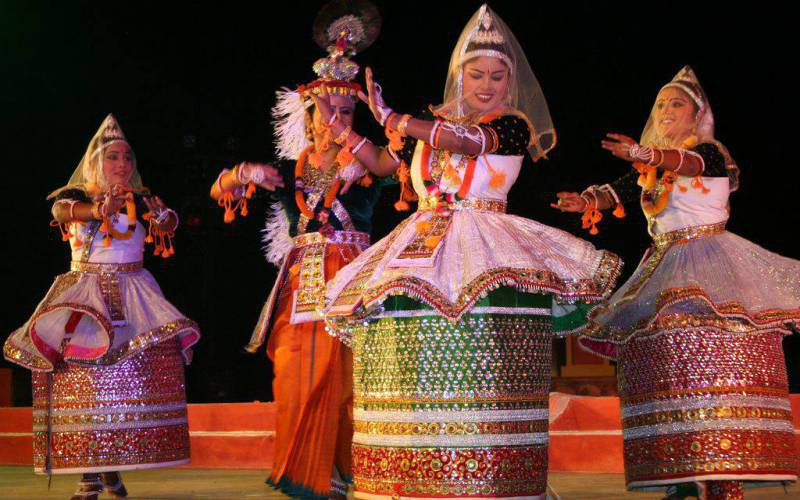

In [22]:
img_name = "/content/dataset/test/108.jpg";
predictions = gtf.Infer(img_name=img_name);

#Display 
from IPython.display import Image
Image(filename=img_name)

Prediction
    Image name:         /content/dataset/test/38.jpg
    Predicted class:      kathak
    Predicted score:      0.9364588260650635



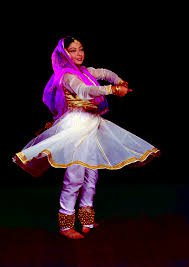

In [23]:
img_name = "/content/dataset/test/38.jpg";
predictions = gtf.Infer(img_name=img_name);

#Display 
from IPython.display import Image
Image(filename=img_name)

Prediction
    Image name:         /content/dataset/test/162.jpg
    Predicted class:      odissi
    Predicted score:      0.43677636981010437



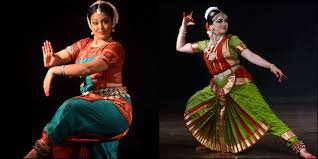

In [30]:
img_name='/content/dataset/test/162.jpg'
predictions = gtf.Infer(img_name=img_name);

#Display 
from IPython.display import Image
Image(filename=img_name)

Prediction
    Image name:         /content/dataset/test/484.jpg
    Predicted class:      odissi
    Predicted score:      0.5718956589698792



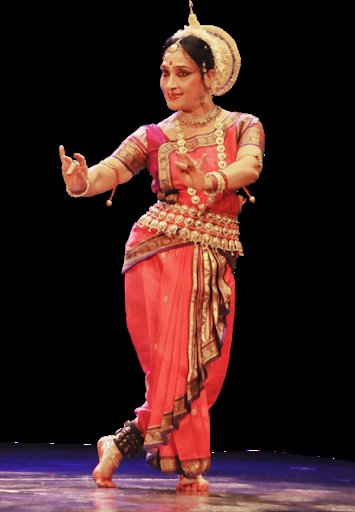

In [31]:
img_name= '/content/dataset/test/484.jpg'
predictions = gtf.Infer(img_name=img_name);

#Display 
from IPython.display import Image
Image(filename=img_name)

In [24]:
test_image_path = os.listdir('/content/dataset/test/')

In [25]:
preds = []
path = '/content/dataset/test/'
for image in test_image_path:
  predictions = gtf.Infer(img_name=path+image)
  preds.append(predictions)


Prediction
    Image name:         /content/dataset/test/232.jpg
    Predicted class:      kathakali
    Predicted score:      0.9999645948410034

Prediction
    Image name:         /content/dataset/test/429.jpg
    Predicted class:      kuchipudi
    Predicted score:      0.35724759101867676

Prediction
    Image name:         /content/dataset/test/411.jpg
    Predicted class:      kathak
    Predicted score:      0.6216238141059875

Prediction
    Image name:         /content/dataset/test/20.jpg
    Predicted class:      kathak
    Predicted score:      0.8775646686553955

Prediction
    Image name:         /content/dataset/test/175.jpg
    Predicted class:      bharatanatyam
    Predicted score:      0.3656950294971466

Prediction
    Image name:         /content/dataset/test/196.jpg
    Predicted class:      kathakali
    Predicted score:      0.9242486357688904

Prediction
    Image name:         /content/dataset/test/508.jpg
    Predicted class:      bharatanatyam
    Predicted s

In [36]:
img_name = []
target = []
score = []
for dta in preds:
  mn = dta['img_name']
  mn = mn.split('/')[-1]
  #print(mn)
  img_name.append(mn)
  target.append(dta['predicted_class'])
  score.append(dta['score'])

In [32]:
test.head()

,Image
0,508.jpg
1,246.jpg
2,473.jpg
3,485.jpg
4,128.jpg


In [37]:
results = pd.DataFrame({'Image':img_name,'target':target,'score':score})

In [38]:
results.head()

,Image,target,score
0,232.jpg,kathakali,0.999965
1,429.jpg,kuchipudi,0.357248
2,411.jpg,kathak,0.621624
3,20.jpg,kathak,0.877565
4,175.jpg,bharatanatyam,0.365695


In [39]:
test = pd.merge(test,results,how='left',on='Image')

In [40]:
test.head()

,Image,target,score
0,508.jpg,bharatanatyam,0.585171
1,246.jpg,bharatanatyam,0.772656
2,473.jpg,bharatanatyam,0.444532
3,485.jpg,odissi,0.334505
4,128.jpg,bharatanatyam,0.538111


In [43]:
test[['Image','target']].to_csv('vgg19.csv',index=False)

Prediction
    Image name:         /content/dataset/test/508.jpg
    Predicted class:      bharatanatyam
    Predicted score:      0.5851712822914124



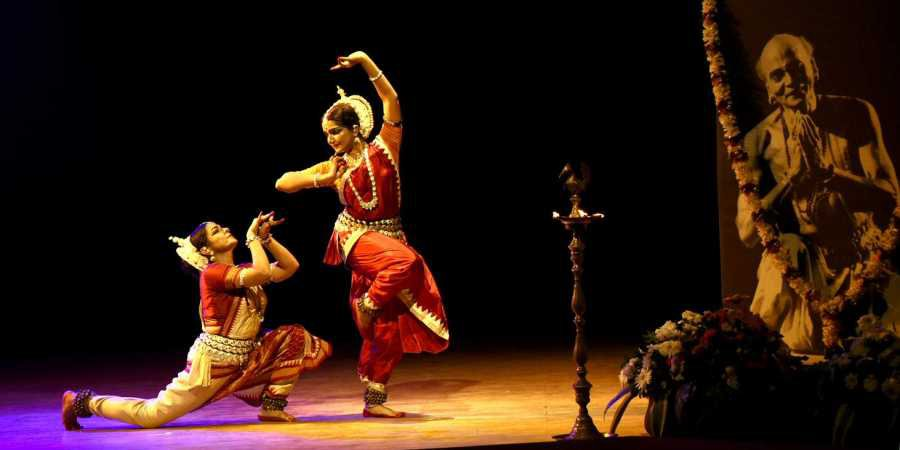

In [41]:
img_name = "/content/dataset/test/508.jpg";
predictions = gtf.Infer(img_name=img_name);

#Display 
from IPython.display import Image
Image(filename=img_name)

Prediction
    Image name:         /content/dataset/test/246.jpg
    Predicted class:      bharatanatyam
    Predicted score:      0.772656261920929



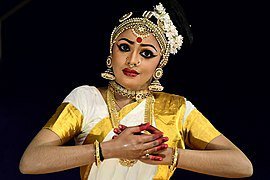

In [42]:
img_name = "/content/dataset/test/246.jpg";
predictions = gtf.Infer(img_name=img_name);

#Display 
from IPython.display import Image
Image(filename=img_name)

# FastAI

In [44]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [45]:
from fastai.vision import *
from fastai.metrics import error_rate

In [46]:
tfms = get_transforms(do_flip=False)

In [49]:
path = '/content/dataset/train/'

In [50]:
data = ImageDataBunch.from_df(path, train, ds_tfms=tfms, size=24)
data.classes

['bharatanatyam',
 'kathak',
 'kathakali',
 'kuchipudi',
 'manipuri',
 'mohiniyattam',
 'odissi',
 'sattriya']

In [51]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [52]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [53]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,3.206644,2.227235,0.736111,00:04
1,3.121230,2.076977,0.763889,00:03
2,2.945710,1.931608,0.750000,00:03
3,2.810305,1.925205,0.722222,00:03


In [54]:
learn.save('dance_form-1')

In [55]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

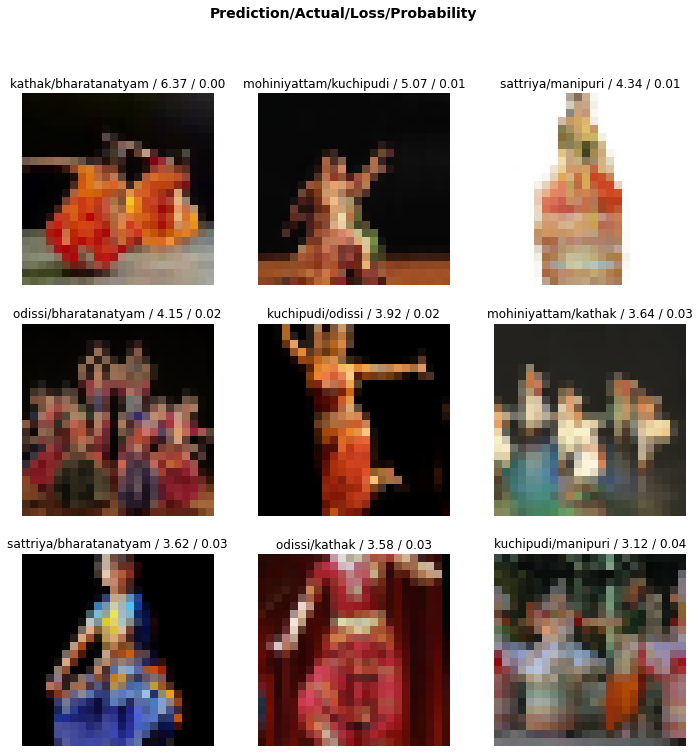

In [57]:
interp.plot_top_losses(9, figsize=(12,12))

In [58]:
doc(interp.plot_top_losses)

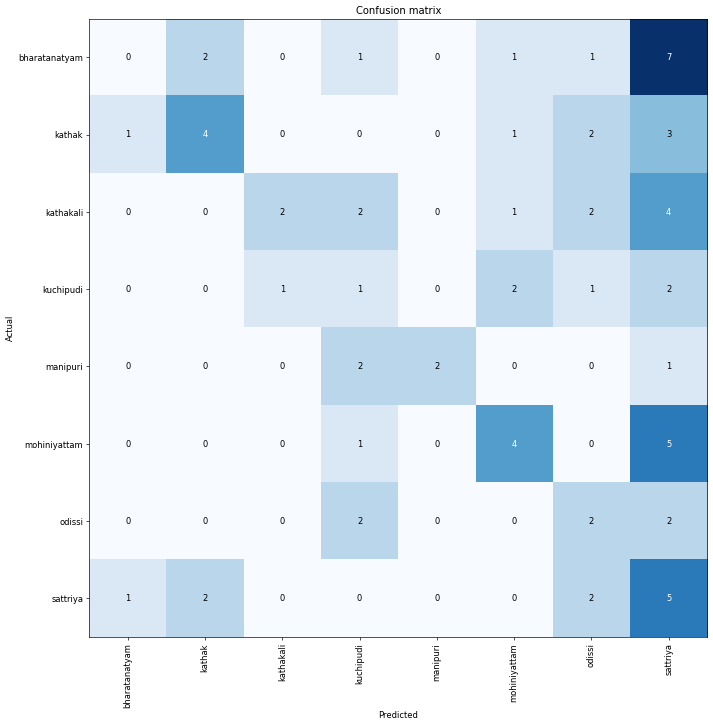

In [59]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [60]:
interp.most_confused(min_val=2)

[('bharatanatyam', 'sattriya', 7),
 ('mohiniyattam', 'sattriya', 5),
 ('kathakali', 'sattriya', 4),
 ('kathak', 'sattriya', 3),
 ('bharatanatyam', 'kathak', 2),
 ('kathak', 'odissi', 2),
 ('kathakali', 'kuchipudi', 2),
 ('kathakali', 'odissi', 2),
 ('kuchipudi', 'mohiniyattam', 2),
 ('kuchipudi', 'sattriya', 2),
 ('manipuri', 'kuchipudi', 2),
 ('odissi', 'kuchipudi', 2),
 ('odissi', 'sattriya', 2),
 ('sattriya', 'kathak', 2),
 ('sattriya', 'odissi', 2)]

In [61]:
learn.unfreeze()

In [62]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,2.575009,1.970256,0.597222,00:03


In [64]:
learn.load('dance_form-1');

In [65]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


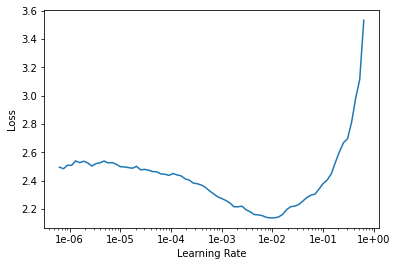

In [66]:

learn.recorder.plot()

In [67]:

learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-3,1e-2))

epoch,train_loss,valid_loss,error_rate,time
0,2.733215,22.899794,0.847222,00:03
1,3.013927,71.518951,0.847222,00:03
